In [1]:
from jupyterworkflow.data import get_fremont_data

In [2]:
%matplotlib inline
#Keeps matplotlib visualizations in the notebook instead of in its own window
import matplotlib.pyplot as plt
plt.style.use('seaborn')
# seaborn aesthetic is preferred by many

In [3]:
data = get_fremont_data()
data.head()

,East,West,Total
Date,,,
2019-02-28 23:00:00,5.0,6.0,11.0
2019-02-28 22:00:00,4.0,27.0,31.0
2019-02-28 21:00:00,16.0,32.0,48.0
2019-02-28 20:00:00,16.0,50.0,66.0
2019-02-28 19:00:00,39.0,59.0,98.0


You can set the indices to be different from the natural integer indices using the index_col parameter in read_csv. It's also a good thing to parse dates.

Take note of what our data represents. It's an hourly count of how many people cross the east/west bridge.

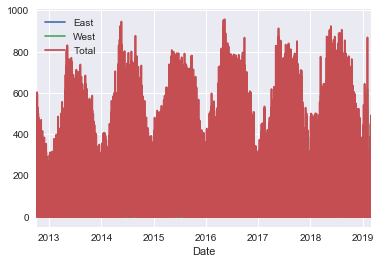

In [4]:
data.plot()

Notice that there might be too many datapoints for this to be digestible. Let's resample this by week instead of hourly. This visualization doesn't really tell us very much other than it seems like the peak number of bikers passing the West Sidewalk seems to be increasing year over year.

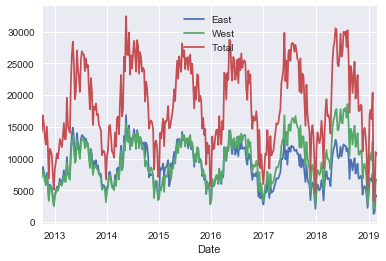

In [5]:
data.resample('W').sum().plot()

Notice that this resampling gives us a visualization that tells us more about the data than the previous one. This one tells a more interesting story. It's a visualization plotting the weekly number of bikers crossing either sidewalk. It suggests that the number of people passing by the East Sidewalk is decreasing year over year, while the number of people passing by the West Sidewalk is increasing year over year.

Note: DataFrame.resample() is for resampling *time series* data.

One question you might ask if whether or not there is any sort of growth or decline in the number of riders. We can see this if we look for a rolling sum year over year.

(0, 1100992.6)

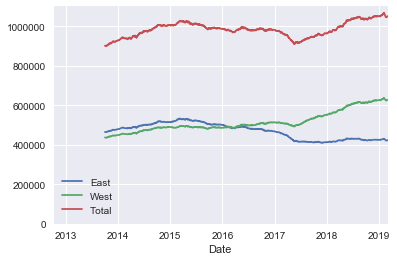

In [6]:
ax = data.resample('D').sum().rolling(365).sum().plot()
ax.set_ylim(0,None)
# want to make sure that the axis starts at 0 in order to maintain magnitude effects

.rolling(365) specifies each datapoint to be the sum of the number of riders over the last 365 days.

Adding the total line lets you see what the overall trend in riders is. It seems like the number of bikers suddenly dipped between 2017 and 2018, then recovered.

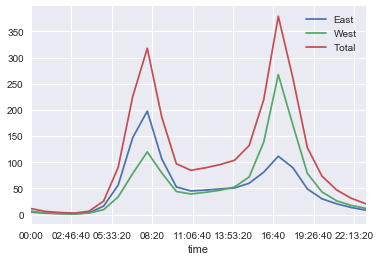

In [7]:
data.groupby(data.index.time).mean().plot()

groupby is self-explanatory. It groups the data by a given parameter. In this case it's grouping by time of day. This allows us to see a daily trend of riders?

It seems like there are two peaks around 8am and a little after 4:40 pm. The start and end of the workday!

Perhaps we want to see some kind of daily trend.

In [8]:
pivoted = data.pivot_table('Total', index=data.index.time, columns=data.index.date)
pivoted.iloc[:5,:5]

,2012-10-03,2012-10-04,2012-10-05,2012-10-06,2012-10-07
00:00:00,13.0,18.0,11.0,15.0,11.0
01:00:00,10.0,3.0,8.0,15.0,17.0
02:00:00,2.0,9.0,7.0,9.0,3.0
03:00:00,5.0,3.0,4.0,3.0,6.0
04:00:00,7.0,8.0,9.0,5.0,3.0


.pivot_table allows us to put our data into a pivot table so we can manipulate how we're splitting our data. In this case we've turned the rows into the hours of the day and each datapoint corresponds to the number of total riders during that hour of each day of the year.

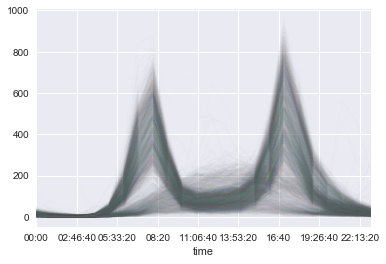

In [9]:
pivoted.plot(legend=False, alpha=0.01)

Looking at this plot, we still see the same 2 peaks, however we see a few days where there isn't really much of a trend. This might be indicative of how the bridge is being used during weekends.

The moral of this is probably to make sure you keep an open mind an curiosity about exploring data in whatever way you can imagine. Each of these graphs is only slightly different from the last, but we slowly build out new insight by doing so.

In [10]:
get_fremont_data?